# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [31]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [32]:
min = sinasc_raw['munResLat'].min()
min

-13.49976

In [33]:
max = sinasc_raw['munResLat'].max()
max

-8.76889

In [34]:
pd.cut(sinasc_raw['munResLat'], [min, -10.5, max]).value_counts()

,count
munResLat,
"(-10.5, -8.769]",14034
"(-13.5, -10.5]",12913


In [35]:
mun_lat = pd.cut(sinasc_raw['munResLat'], [min, -10.5, max])

In [36]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [37]:
sinasc1 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
                                 index=mun_lat,
                                 aggfunc=['sum','mean', 'min','max','median','std', 'var'])

<ipython-input-37-6adb1e0fee83>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc1 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-37-6adb1e0fee83>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc1 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-37-6adb1e0fee83>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc1 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-37-6adb1e0fee83>:1: FutureWarning: The defa

In [38]:
sinasc1

sum                 mean                  min  \
                CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS   
munResLat                                                             
(-13.5, -10.5]      47690    15219.0  3.693177   1.187037         1   
(-10.5, -8.769]     48662    17615.0  3.467436   1.364024         1   

                                 max               median             \
                QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT   
munResLat                                                              
(-13.5, -10.5]         0.0         9       15.0       4.0        1.0   
(-10.5, -8.769]        0.0         9       52.0       4.0        1.0   

                      std                  var             
                CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT  
munResLat                                                  
(-13.5, -10.5]   0.644439   1.305499  0.415301   1.704328  
(-10.5, -8.769]  0.888240   1.492482  0.788970   2.227501

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [39]:
min = sinasc_raw['munResArea'].min()
min

459.978

In [40]:
max = sinasc_raw['munResArea'].max()
max

34096.394

In [41]:
pd.cut(sinasc_raw['munResArea'], [min, 3000, max]).value_counts()

,count
munResArea,
"(3000.0, 34096.394]",21808
"(459.978, 3000.0]",5155


In [42]:
mun_area = pd.cut(sinasc_raw['munResArea'], [min, 3000, max])

In [43]:
sinasc_raw['IDANOMAL'].unique()

array([ 2.,  1., nan,  9.])

In [44]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [45]:
sinasc2 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
                                 index=mun_area,
                                 aggfunc=['sum','mean', 'min','max','median','std', 'var'])

<ipython-input-45-f4d41706513e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc2 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-45-f4d41706513e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc2 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-45-f4d41706513e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc2 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-45-f4d41706513e>:1: FutureWarning: The defa

In [46]:
sinasc2

sum                 mean                  min  \
                    CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS   
munResArea                                                                
(459.978, 3000.0]       19272     5804.0  3.738506   1.135590         1   
(3000.0, 34096.394]     77142    27046.0  3.537326   1.310368         1   

                                     max               median             \
                    QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT   
munResArea                                                                 
(459.978, 3000.0]          0.0         9        9.0       4.0        1.0   
(3000.0, 34096.394]        0.0         9       52.0       4.0        1.0   

                          std                  var             
                    CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT  
munResArea                                                     
(459.978, 3000.0]    0.608679   1.209635  0.370490   1.463216  
(3000.0, 34096.394]  0.820967   1.447429  0.673986   2.095052

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [47]:
pd.cut(sinasc_raw['munResArea'], 4).value_counts()

,count
munResArea,
"(426.342, 8869.082]",15484
"(25687.29, 34096.394]",8437
"(8869.082, 17278.186]",2325
"(17278.186, 25687.29]",781


In [48]:
mun_area_quantiles = pd.cut(sinasc_raw['munResArea'], 4)

In [49]:
sinasc3 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
                                 index=mun_area,
                                 aggfunc=['sum','mean', 'min','max','median','std', 'var'])

<ipython-input-49-b4964ae4f444>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc3 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-49-b4964ae4f444>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc3 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-49-b4964ae4f444>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc3 = sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
<ipython-input-49-b4964ae4f444>:1: FutureWarning: The defa

In [50]:
sinasc3

sum                 mean                  min  \
                    CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS   
munResArea                                                                
(459.978, 3000.0]       19272     5804.0  3.738506   1.135590         1   
(3000.0, 34096.394]     77142    27046.0  3.537326   1.310368         1   

                                     max               median             \
                    QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT   
munResArea                                                                 
(459.978, 3000.0]          0.0         9        9.0       4.0        1.0   
(3000.0, 34096.394]        0.0         9       52.0       4.0        1.0   

                          std                  var             
                    CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT  
munResArea                                                     
(459.978, 3000.0]    0.608679   1.209635  0.370490   1.463216  
(3000.0, 34096.394]  0.820967   1.447429  0.673986   2.095052

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [51]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [52]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [55]:
sinasc4 = sinasc_raw.set_index('munResNome')
sinasc4 = sinasc4.groupby(imediatas)['IDADEMAE'].mean()

In [81]:
sinasc4 = sinasc4.sort_values(ascending=True)

<Axes: xlabel='munResNome'>

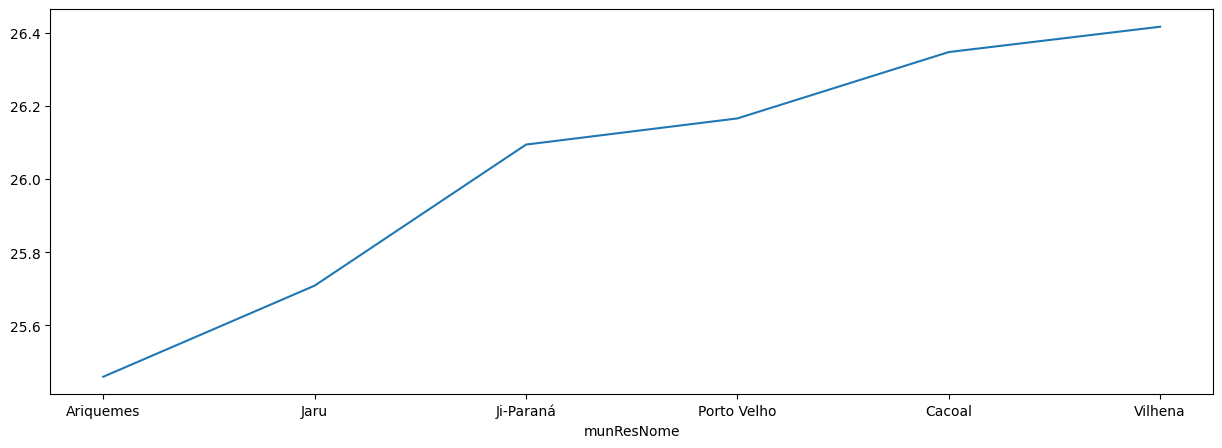

In [82]:
sinasc4.plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [59]:
idh_classificacao = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [60]:
sinasc5 = sinasc_raw.set_index('munResNome')
sinasc5 = sinasc5.groupby(idh_classificacao)['IDADEMAE'].mean()

In [67]:
sinasc5 = sinasc5.sort_values(ascending=True)

<Axes: xlabel='munResNome'>

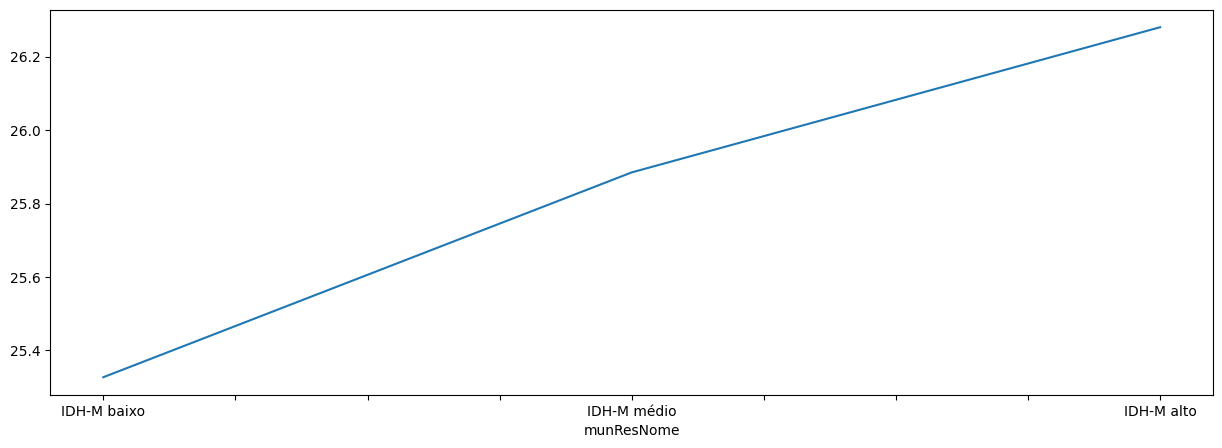

In [68]:
sinasc5.plot(figsize=[15,5])

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [69]:
desenvolvimento_classificacao = {
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
}


In [73]:
sinasc6 = sinasc_raw.set_index('munResNome')
sinasc6 = sinasc6.groupby(desenvolvimento_classificacao)['IDADEMAE'].mean()

In [74]:
sinasc6

,IDADEMAE
munResNome,
Desenvolvimento moderado,26.226921
Desenvolvimento regular,25.412005


In [75]:
sinasc6 = sinasc6.sort_values(ascending=True)
sinasc6

,IDADEMAE
munResNome,
Desenvolvimento regular,25.412005
Desenvolvimento moderado,26.226921


<Axes: xlabel='munResNome'>

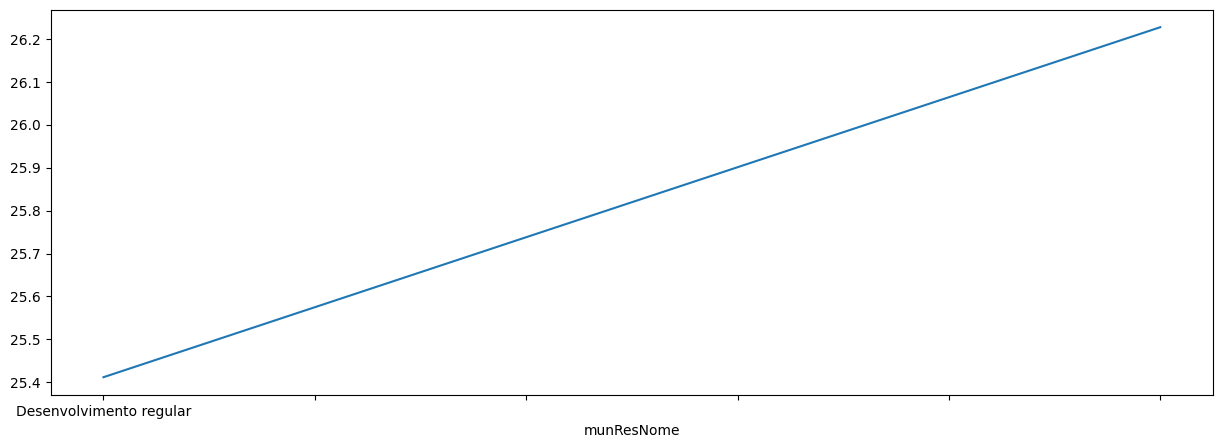

In [76]:
sinasc6.plot(figsize=[15,5])

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [77]:
pib_classificacao = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
}


In [78]:
sinasc6 = sinasc_raw.set_index('munResNome')
sinasc6 = sinasc6.groupby(pib_classificacao)['IDADEMAE'].mean()
sinasc6

,IDADEMAE
munResNome,
Acima de 1 Bilhão,26.265562
Acima de 100 Milhões,25.638424
Acima de 200 Milhões,25.146435
Acima de 300 Milhões,25.706070
Acima de 500 Milhões,25.785927
Até 100 Milhões,26.519894


In [79]:
sinasc6 = sinasc6.sort_values(ascending=True)
sinasc6

,IDADEMAE
munResNome,
Acima de 200 Milhões,25.146435
Acima de 100 Milhões,25.638424
Acima de 300 Milhões,25.706070
Acima de 500 Milhões,25.785927
Acima de 1 Bilhão,26.265562
Até 100 Milhões,26.519894


<Axes: xlabel='munResNome'>

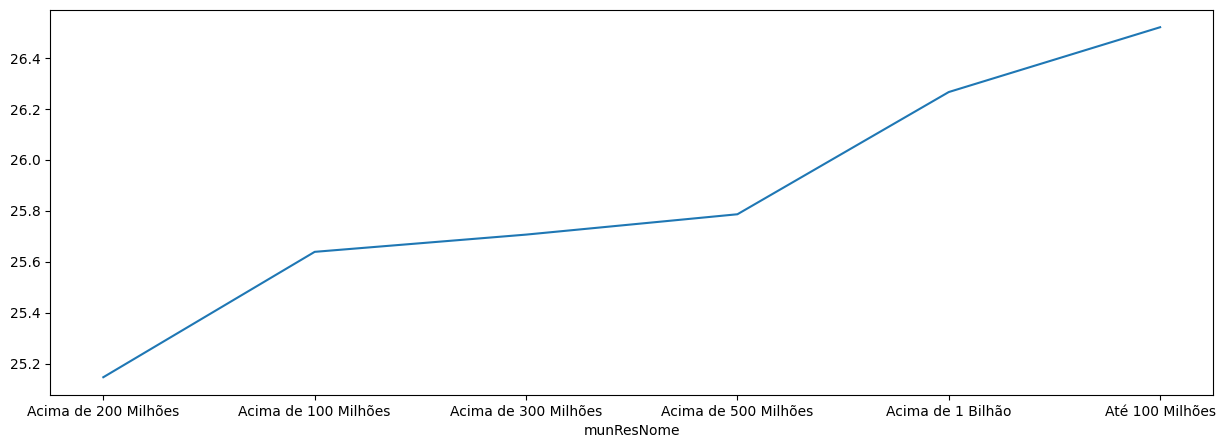

In [80]:
sinasc6.plot(figsize=[15,5])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Insights:
1. A idade da mãe é maior conforme o IDH aumenta
2. A idade da mãe também possui relação com o desenvolvimento.
3. A idade da mãe tende a ser maior quando o PIB é maior mas não é uma regra.
4. Vilhena é a região imediata com a maior média de idade para Mães